In [106]:
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

from src.data_transformations import *

In [108]:
df = pd.read_csv('../data/samples/sample.csv')
df = df.sample(10_000, random_state=42)

### Preprocessing

In [109]:
df = pull_features(df)
df = handle_missing_values(df)
df = handle_duplicates(df)
df = fix_dtypes(df)
df = encode_op_airline(df)
df = hash_tail_number(df)
df = process_time_data(df)
df

,Cancelled,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,...,Operating_Airline_YX,Operating_Airline_ZW,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DepTimeHH_sin,DepTimeHH_cos,DepTimeMM_sin,DepTimeMM_cos
363372,False,-5,2219,46,89,259,981,10397,10994,18,...,False,False,8.660254e-01,0.500000,0.988468,0.151428,-0.866025,5.000000e-01,-0.866025,0.500000
385186,False,18,1709,48,66,301,509,14711,11433,1,...,False,False,5.000000e-01,-0.866025,0.988468,0.151428,-0.866025,-5.000000e-01,0.309017,0.951057
46399,False,-6,1258,310,324,2504,507,12892,12758,-27,...,False,False,5.000000e-01,-0.866025,-0.937752,0.347305,0.500000,-8.660254e-01,-0.406737,-0.913545
577384,False,-1,2110,159,178,1005,588,12339,11697,12,...,False,False,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,0.951057,0.309017
127166,False,-3,1412,97,120,740,837,13930,12478,-18,...,True,False,8.660254e-01,0.500000,0.299363,-0.954139,0.258819,-9.659258e-01,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127056,False,94,1710,77,102,391,500,14869,11292,109,...,False,False,5.000000e-01,-0.866025,-0.394356,0.918958,-0.707107,-7.071068e-01,0.207912,-0.978148
405196,False,23,2130,147,177,1127,156,11697,11433,21,...,False,False,1.224647e-16,-1.000000,0.394356,0.918958,-1.000000,-1.836970e-16,-0.309017,-0.951057
269403,False,-8,1438,75,109,472,534,13871,11292,-2,...,False,False,5.000000e-01,-0.866025,-0.201299,0.979530,-0.258819,-9.659258e-01,-0.913545,0.406737
88033,True,0,0,0,0,759,956,11278,13204,0,...,False,False,5.000000e-01,0.866025,0.571268,0.820763,0.000000,1.000000e+00,0.000000,1.000000


In [110]:
df

,Cancelled,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,...,Operating_Airline_YX,Operating_Airline_ZW,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DepTimeHH_sin,DepTimeHH_cos,DepTimeMM_sin,DepTimeMM_cos
363372,False,-5,2219,46,89,259,981,10397,10994,18,...,False,False,8.660254e-01,0.500000,0.988468,0.151428,-0.866025,5.000000e-01,-0.866025,0.500000
385186,False,18,1709,48,66,301,509,14711,11433,1,...,False,False,5.000000e-01,-0.866025,0.988468,0.151428,-0.866025,-5.000000e-01,0.309017,0.951057
46399,False,-6,1258,310,324,2504,507,12892,12758,-27,...,False,False,5.000000e-01,-0.866025,-0.937752,0.347305,0.500000,-8.660254e-01,-0.406737,-0.913545
577384,False,-1,2110,159,178,1005,588,12339,11697,12,...,False,False,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,0.951057,0.309017
127166,False,-3,1412,97,120,740,837,13930,12478,-18,...,True,False,8.660254e-01,0.500000,0.299363,-0.954139,0.258819,-9.659258e-01,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127056,False,94,1710,77,102,391,500,14869,11292,109,...,False,False,5.000000e-01,-0.866025,-0.394356,0.918958,-0.707107,-7.071068e-01,0.207912,-0.978148
405196,False,23,2130,147,177,1127,156,11697,11433,21,...,False,False,1.224647e-16,-1.000000,0.394356,0.918958,-1.000000,-1.836970e-16,-0.309017,-0.951057
269403,False,-8,1438,75,109,472,534,13871,11292,-2,...,False,False,5.000000e-01,-0.866025,-0.201299,0.979530,-0.258819,-9.659258e-01,-0.913545,0.406737
88033,True,0,0,0,0,759,956,11278,13204,0,...,False,False,5.000000e-01,0.866025,0.571268,0.820763,0.000000,1.000000e+00,0.000000,1.000000


In [111]:
df.columns

Index(['Cancelled', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime',
       'Distance', 'Tail_Number', 'OriginAirportID', 'DestAirportID',
       'ArrDelay', 'Operating_Airline_9E', 'Operating_Airline_AA',
       'Operating_Airline_AS', 'Operating_Airline_B6', 'Operating_Airline_C5',
       'Operating_Airline_DL', 'Operating_Airline_F9', 'Operating_Airline_G4',
       'Operating_Airline_G7', 'Operating_Airline_HA', 'Operating_Airline_MQ',
       'Operating_Airline_NK', 'Operating_Airline_OH', 'Operating_Airline_OO',
       'Operating_Airline_PT', 'Operating_Airline_QX', 'Operating_Airline_UA',
       'Operating_Airline_WN', 'Operating_Airline_YV', 'Operating_Airline_YX',
       'Operating_Airline_ZW', 'Month_sin', 'Month_cos', 'DayofMonth_sin',
       'DayofMonth_cos', 'DepTimeHH_sin', 'DepTimeHH_cos', 'DepTimeMM_sin',
       'DepTimeMM_cos'],
      dtype='object')

### Extracting the target column

In [112]:
# df["Delayed"] = np.where((df["DepDelay"] > 0) & (df["Cancelled"] == False), True, False)
df["On-time"] = np.where((df["DepDelay"] <= 0) & (df["Cancelled"] == False), True, False)
df["Target"] = np.select([df["On-time"], df["Cancelled"]], [0, 1])

df = df.drop(["Cancelled", "On-time"], axis=1)
df

,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,Operating_Airline_9E,...,Operating_Airline_ZW,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DepTimeHH_sin,DepTimeHH_cos,DepTimeMM_sin,DepTimeMM_cos,Target
363372,-5,2219,46,89,259,981,10397,10994,18,False,...,False,8.660254e-01,0.500000,0.988468,0.151428,-0.866025,5.000000e-01,-0.866025,0.500000,0
385186,18,1709,48,66,301,509,14711,11433,1,False,...,False,5.000000e-01,-0.866025,0.988468,0.151428,-0.866025,-5.000000e-01,0.309017,0.951057,0
46399,-6,1258,310,324,2504,507,12892,12758,-27,False,...,False,5.000000e-01,-0.866025,-0.937752,0.347305,0.500000,-8.660254e-01,-0.406737,-0.913545,0
577384,-1,2110,159,178,1005,588,12339,11697,12,False,...,False,5.000000e-01,0.866025,-0.790776,-0.612106,-1.000000,-1.836970e-16,0.951057,0.309017,0
127166,-3,1412,97,120,740,837,13930,12478,-18,False,...,False,8.660254e-01,0.500000,0.299363,-0.954139,0.258819,-9.659258e-01,0.951057,0.309017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127056,94,1710,77,102,391,500,14869,11292,109,False,...,False,5.000000e-01,-0.866025,-0.394356,0.918958,-0.707107,-7.071068e-01,0.207912,-0.978148,0
405196,23,2130,147,177,1127,156,11697,11433,21,False,...,False,1.224647e-16,-1.000000,0.394356,0.918958,-1.000000,-1.836970e-16,-0.309017,-0.951057,0
269403,-8,1438,75,109,472,534,13871,11292,-2,False,...,False,5.000000e-01,-0.866025,-0.201299,0.979530,-0.258819,-9.659258e-01,-0.913545,0.406737,0
88033,0,0,0,0,759,956,11278,13204,0,False,...,False,5.000000e-01,0.866025,0.571268,0.820763,0.000000,1.000000e+00,0.000000,1.000000,1


### Removing features unavailable at inference

In [113]:
df = df.drop(
    [
        "DepDelay",
        "ArrTime",
        "AirTime",
        "ActualElapsedTime",
        "ArrDelay",
    ],
    axis=1,
)

In [114]:
df.columns

Index(['Distance', 'Tail_Number', 'OriginAirportID', 'DestAirportID',
       'Operating_Airline_9E', 'Operating_Airline_AA', 'Operating_Airline_AS',
       'Operating_Airline_B6', 'Operating_Airline_C5', 'Operating_Airline_DL',
       'Operating_Airline_F9', 'Operating_Airline_G4', 'Operating_Airline_G7',
       'Operating_Airline_HA', 'Operating_Airline_MQ', 'Operating_Airline_NK',
       'Operating_Airline_OH', 'Operating_Airline_OO', 'Operating_Airline_PT',
       'Operating_Airline_QX', 'Operating_Airline_UA', 'Operating_Airline_WN',
       'Operating_Airline_YV', 'Operating_Airline_YX', 'Operating_Airline_ZW',
       'Month_sin', 'Month_cos', 'DayofMonth_sin', 'DayofMonth_cos',
       'DepTimeHH_sin', 'DepTimeHH_cos', 'DepTimeMM_sin', 'DepTimeMM_cos',
       'Target'],
      dtype='object')

### Analyzing categorical and numerical features

In [83]:
categorical_cols = [
    "Tail_Number",
    "OriginAirportID",
    "DestAirportID",
    "Operating_Airline_9E",
    "Operating_Airline_AA",
    "Operating_Airline_AS",
    "Operating_Airline_B6",
    "Operating_Airline_C5",
    "Operating_Airline_DL",
    "Operating_Airline_F9",
    "Operating_Airline_G4",
    "Operating_Airline_G7",
    "Operating_Airline_HA",
    "Operating_Airline_MQ",
    "Operating_Airline_NK",
    "Operating_Airline_OH",
    "Operating_Airline_OO",
    "Operating_Airline_PT",
    "Operating_Airline_QX",
    "Operating_Airline_UA",
    "Operating_Airline_WN",
    "Operating_Airline_YV",
    "Operating_Airline_YX",
    "Operating_Airline_ZW",
]

df_cat = df[categorical_cols + ['Target']]


In [84]:
from sklearn.preprocessing import StandardScaler

df_num = df.drop(categorical_cols, axis=1)
std = StandardScaler()

scaled = pd.DataFrame(
    std.fit_transform(df_num.drop(["Target"], axis=1)),
    columns=df_num.columns[:-1],
    index=df_num.index,
)
print(scaled.shape)
print(df["Target"].shape)

df_num2 = pd.concat([scaled, df_num["Target"]], axis=1)
df_num2

(10000, 9)
(10000,)


,Distance,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DepTimeHH_sin,DepTimeHH_cos,DepTimeMM_sin,DepTimeMM_cos,Target
363372,-0.901870,1.007140,1.133617,1.406275,0.258795,-1.078138,1.324810,-1.234804,0.618213,0
385186,-0.833121,0.297033,-0.769056,1.406275,0.258795,-1.078138,-0.332493,0.475736,1.240679,0
46399,2.772957,0.297033,-0.769056,-1.302050,0.537737,0.779143,-0.939108,-0.566206,-1.332502,0
577384,0.319253,0.297033,1.643436,-1.095397,-0.828524,-1.260293,0.496158,1.410370,0.354654,0
127166,-0.114524,1.007140,1.133617,0.437372,-1.315601,0.451228,-1.104673,1.410370,0.354654,0
...,...,...,...,...,...,...,...,...,...,...
127056,-0.685800,0.297033,-0.769056,-0.538019,1.351806,-0.862068,-0.675732,0.328554,-1.421654,0
405196,0.518954,-0.672992,-0.955662,0.570934,1.351806,-1.260293,0.496158,-0.423952,-1.384268,0
269403,-0.553212,0.297033,-0.769056,-0.266574,1.438064,-0.252565,-1.104673,-1.303980,0.489508,0
88033,-0.083423,0.297033,1.643436,0.819679,1.211971,0.099331,2.153461,0.025892,1.308222,1


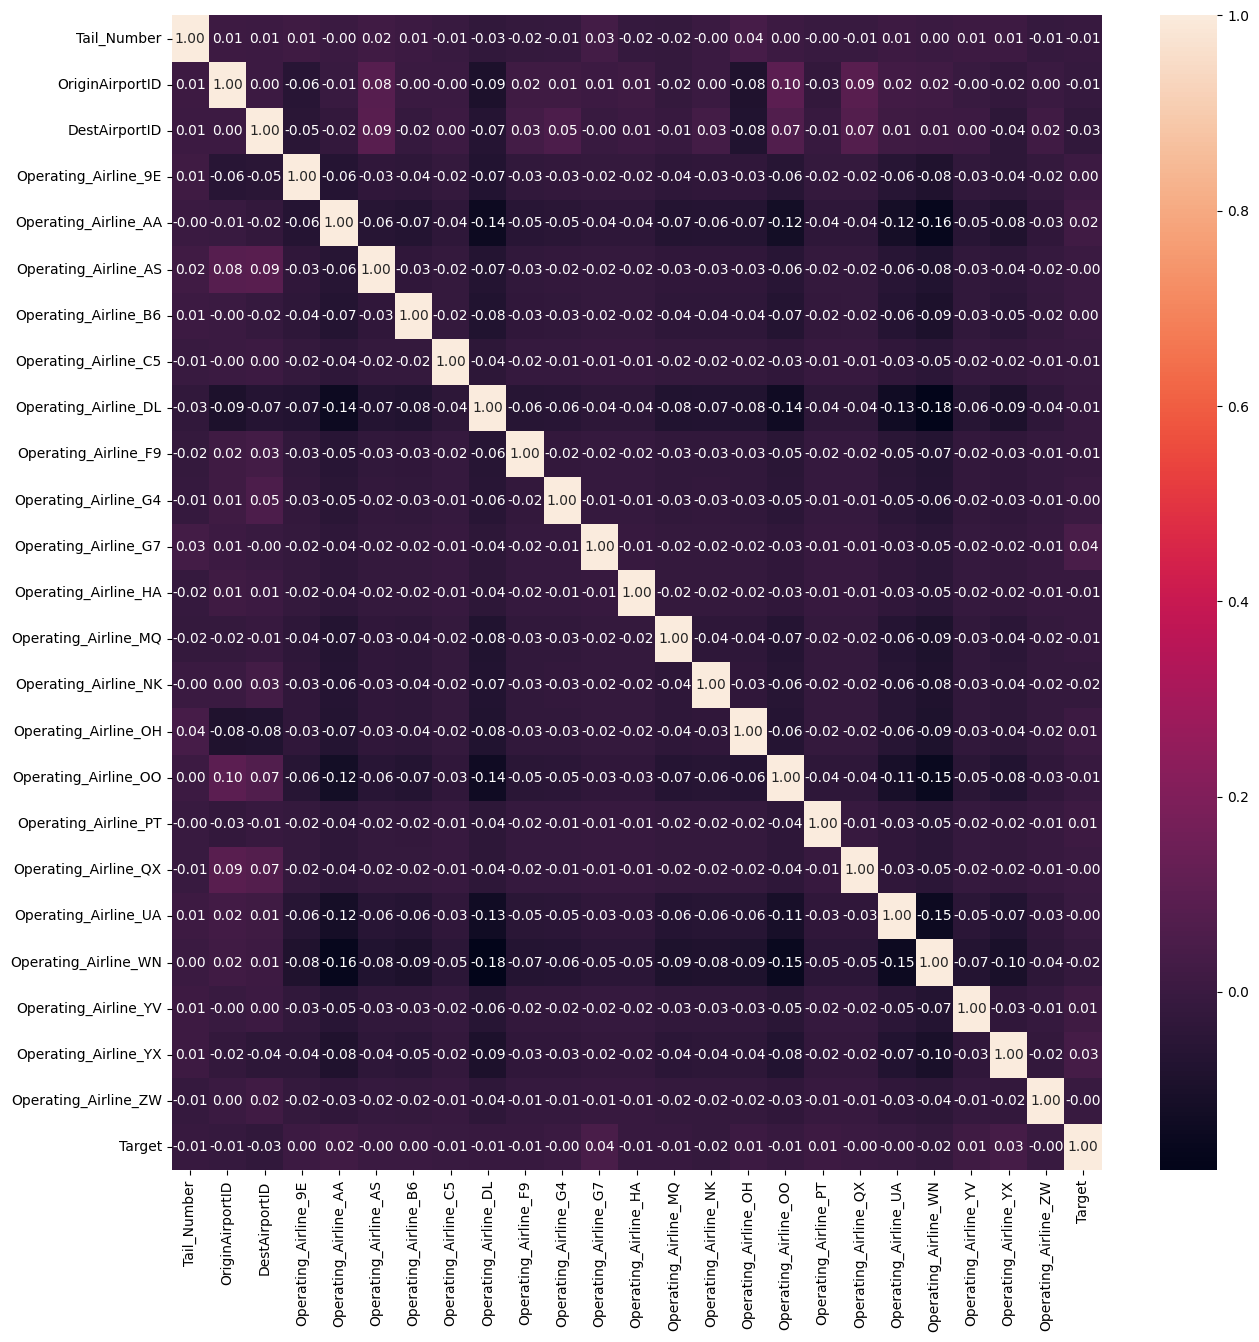

In [85]:
corr = df_cat.corr("spearman")
plt.figure(figsize=(15, 15))
sn.heatmap(
    corr,
    annot=True,
    fmt=".2f",
)
most_correlated_categorical_features = list(corr[corr['Target'].abs() > 0.05].index)[:-1]

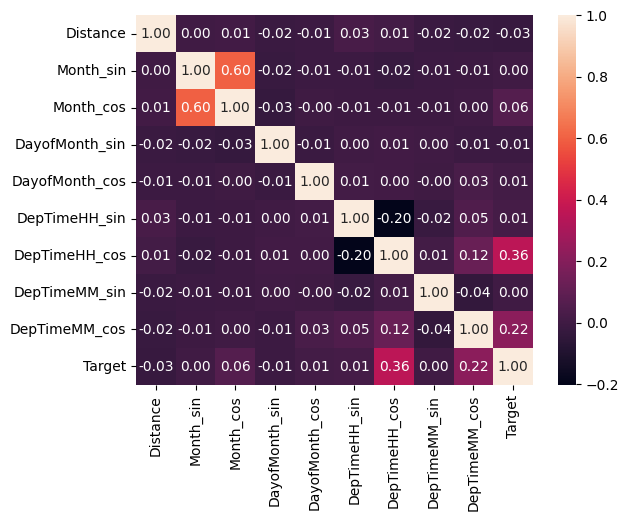

In [86]:
corr = df_num.corr()
sn.heatmap(corr, annot=True, fmt='.2f')

most_correlated_num_features = list(corr[corr['Target'].abs() > 0.05].index)[:-1]

In [87]:
df = pd.concat(
    [
        df_cat[most_correlated_categorical_features],
        df_num[most_correlated_num_features],
        df["Target"],
    ],
    axis=1,
)

In [105]:
df

,Month_cos,DepTimeHH_cos,DepTimeMM_cos,Target
363372,0.500000,5.000000e-01,0.500000,0
385186,-0.866025,-5.000000e-01,0.951057,0
46399,-0.866025,-8.660254e-01,-0.913545,0
577384,0.866025,-1.836970e-16,0.309017,0
127166,0.500000,-9.659258e-01,0.309017,0
...,...,...,...,...
127056,-0.866025,-7.071068e-01,-0.978148,0
405196,-1.000000,-1.836970e-16,-0.951057,0
269403,-0.866025,-9.659258e-01,0.406737,0
88033,0.866025,1.000000e+00,1.000000,1


### Train test split

In [89]:
from sklearn.model_selection import train_test_split


X = df.drop(['Target'], axis=1)
y = df['Target']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Pipelines

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [92]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


def metr(y_pred):
    print("Accuracy:", accuracy_score(y_pred, y_test))
    print("Precision:", precision_score(y_pred, y_test))
    print("Recall:", recall_score(y_pred, y_test))
    print("F1:", f1_score(y_pred, y_test))

In [93]:
svc = SVC()
svc.fit(X_train, y_train)

print('SVM')
metr(svc.predict(X_test))

SVM
Accuracy: 0.9924
Precision: 0.9682539682539683
Recall: 0.782051282051282
F1: 0.8652482269503546


In [94]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(
    estimator=rf,
    param_grid={
        "n_estimators": np.linspace(70, 200, num=7).astype('int64'),
        "criterion": ["gini", "entropy", "log_loss"],
    },
    cv=5,
    scoring={
        "accuracy_score": make_scorer(accuracy_score),
        "precision_score": make_scorer(precision_score),
        "recall_score": make_scorer(recall_score),
        "f1_score": make_scorer(f1_score),
    },
    refit="f1_score",
    verbose=2,
)

rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ....................criterion=gini, n_estimators=70; total time=   0.4s
[CV] END ....................criterion=gini, n_estimators=70; total time=   0.4s
[CV] END ....................criterion=gini, n_estimators=70; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=70; total time=   0.4s
[CV] END ....................criterion=gini, n_estimators=70; total time=   0.4s
[CV] END ....................criterion=gini, n_estimators=91; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=91; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=91; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=91; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=91; total time=   0.6s
[CV] END ...................criterion=gini, n_estimators=113; total time=   0.6s
[CV] END ...................criterion=gini, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': array([ 70,  91, 113, 135, 156, 178, 200])},
             refit='f1_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')},
             verbose=2)

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
print('RF')
metr(rf.predict(X_test))

RF
Accuracy: 0.9992
Precision: 0.9682539682539683
Recall: 1.0
F1: 0.9838709677419355


In [97]:
print('RF best')
metr(rf_cv.best_estimator_.predict(X_test))

RF best


Accuracy: 0.9992
Precision: 0.9682539682539683
Recall: 1.0
F1: 0.9838709677419355


### Confusion matrix of the model

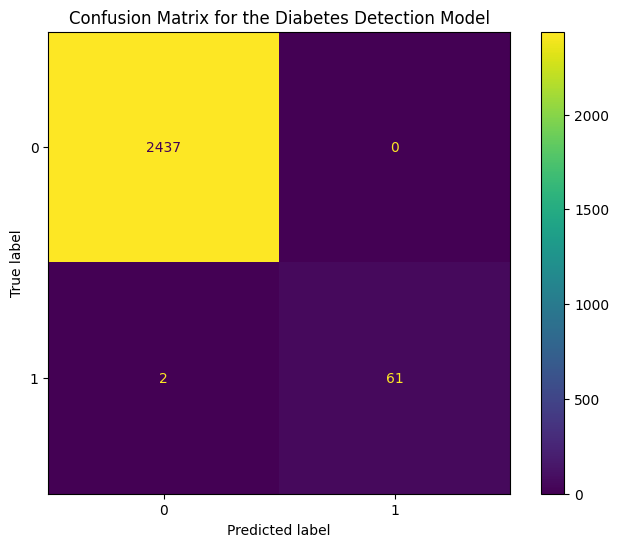

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf_cv.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
 
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
 
# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=rf_cv.best_estimator_.classes_)
 
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')
 
# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)

### Results
Results show metrics that exceed expectations. This might be due to poor interpretation of the features. We guess that this could be due to us dropping CRS time instead. EDA, which was done after the POC model was developed, shows that DepTIime  We will look into this in later stages. At the moment we can see that the project is at least feasible with data at hand.